<a href="https://colab.research.google.com/github/SandeepJosyula/NeuralNetworks/blob/master/SJ_ComputerVision_Project_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV Project -Face Mask Segmentation

**Project Description:**

In this hands-on project, the goal is to build a Face Mask Segmentation model
which includes building a face detector to locate the position of a face in an
image.

**Data Description:** WIDER Face Dataset

WIDER FACE dataset is a Face Mask Segmentation benchmark dataset, of which
images are selected from the publicly available WIDER dataset. This data have 32,203 images and 393,703 faces are labeled with a high degree of
variability in scale, pose and occlusion as depicted in the sample images.
In this project, we are using 409 images and around 1000 faces for ease of
computation.

We will be using transfer learning on an already trained model to build our
segmenter. We will perform transfer learning on the MobileNet model which is
already trained to perform image segmentation. We will need to train the last 6-7 layers and freeze the remaining layers to train the model for face mask
segmentation. To be able to train the MobileNet model for face mask
segmentation, we will be using the WIDER FACE dataset for various images with a
single face and multiple faces. The output of the model is the face mask
segmented data which masks the face in an image. We learn to build a face mask
segmentation model using Keras supported by Tensorflow.

**Reference**
Acknowledgment for the datasets.
http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/

Mobile Net paper: https://arxiv.org/pdf/1704.04861.pdf

**Objective:**
In this problem, we use "Transfer Learning" of an Image Segmentation model to
detect any object according to the problem in hand.

Here, we are particularly interested in segmenting faces in a given image
Steps and Tasks:
 - Load the dataset given in form .npy format.
    - We have already extracted the images from wider face-dataset and
added it in the file images.npy. You can directly use this file for this
project.
    - “images.npy” contains details about the image and it’s masks, there
is no separate CSV file for that
    - There is no separate train and test data given
 -  Create Features(images) and labels(mask) using that data.
 - Load the pre-trained model and weights. 
 - Create a model using the above model.
 - Define the Dice Coefficient and Loss function.
 - Compile and fit the model.
 - Evaluate the model.

**Note:** Detailed Instructions for all the above steps are given in the notebook

## Import Libraries

In [33]:
%tensorflow_version 2.x
import tensorflow as tf
tensorflow.__version__

'2.3.0'

In [34]:
import numpy as np
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
project_path = '/content/drive/My Drive/Study/AI_ML_Study/GreatLearning_UT_Texas/9.Computer_Vision/Project/'

## Data Load

In [37]:
data = np.load(project_path + 'images.npy', allow_pickle=True)

In [38]:
data.shape

(409, 2)

In [42]:
data[60][1]

[{'imageHeight': 180,
  'imageWidth': 320,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.671875, 'y': 0.20555555555555555},
   {'x': 0.846875, 'y': 0.5111111111111111}]},
 {'imageHeight': 180,
  'imageWidth': 320,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.159375, 'y': 0.16666666666666666},
   {'x': 0.2875, 'y': 0.4888888888888889}]}]

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 


In [41]:
IMAGE_WIDTH = 224 
IMAGE_HEIGHT = 224

In [43]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (2 marks)

In [44]:
X_train.shape

(409, 224, 224, 3)

In [45]:
masks.shape

(409, 224, 224)

### Print a sample image and image array


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

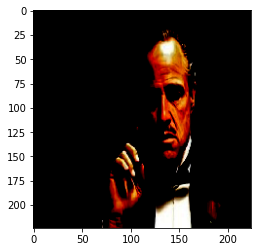

In [46]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

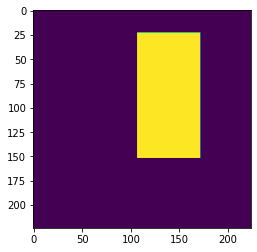

In [47]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly


In [48]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = #### Add your code here ####
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####

    return #### Add your code here ####

SyntaxError: ignored

### Call the create_model function

In [ ]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

### Define dice coefficient function (10 marks)
- Create a function to calculate dice coefficient


In [ ]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    return #### Add your code here ####

### Define loss

In [ ]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
#### Add your code here ####

### Define checkpoint and earlystopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [ ]:
#### Add your code here ####

### Get the predicted mask for a sample image   (5 marks)

In [ ]:
n = 10
sample_image = X_train[n]

#### Add your code here ####

### Impose the mask on the image (5 marks)

In [ ]:
#### Add your code here ####